In [3]:
from ldpc_bpsk_gaussian_system import LdpcBpskGaussianSystem
from utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [9]:
N = 1001
n_groups = 100
N_bits = N * n_groups
dv = 3
dc = 7
max_iter = 50
Eb = 1
snr_db_values = np.arange(0, 5.5, 0.5)
N0_values = [N0_from_db_value(i, Eb) for i in snr_db_values]
original = np.zeros(N_bits)
info_bit_error_probas = []
uncoded_info_bit_error_probas = []

for N0 in N0_values:
    system = LdpcBpskGaussianSystem(N0, Eb, dv, dc, N, max_iter)
    decoded_bits_groups = []
    uncoded_bits_groups = []
    for i in tqdm(range(n_groups)):
        decoded_bits_groups.append(system.apply_noise_and_decode()) 
        uncoded_bits_groups.append(system.get_uncoded_bits())
    decoded_bits_groups = np.array(decoded_bits_groups)
    uncoded_bits_groups = np.array(uncoded_bits_groups)
    decoded = decoded_bits_groups.reshape(-1)
    uncoded = uncoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas.append(info_bit_error_proba)
    uncoded_info_bit_error_proba = np.not_equal(original, uncoded).sum()/len(original)
    uncoded_info_bit_error_probas.append(uncoded_info_bit_error_proba)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:15<00:00,  6.61it/s]


In [10]:
info_bit_error_probas

[0.05118881118881119,
 0.037782217782217783,
 0.024395604395604394,
 0.015714285714285715,
 0.009300699300699301,
 0.004845154845154845,
 0.0025574425574425574,
 0.0009090909090909091,
 0.00035964035964035964,
 0.00014985014985014985,
 2.997002997002997e-05]

In [11]:
uncoded_info_bit_error_probas

[0.0786013986013986,
 0.06645354645354645,
 0.05588411588411588,
 0.04627372627372627,
 0.03697302697302697,
 0.029640359640359642,
 0.023476523476523476,
 0.016983016983016984,
 0.012537462537462537,
 0.009390609390609391,
 0.006023976023976024]

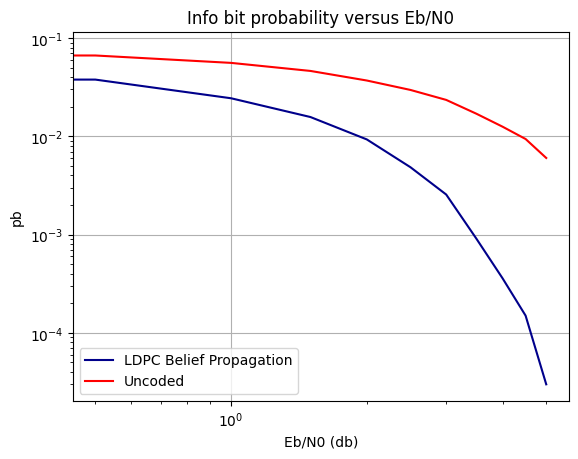

In [12]:
fig, ax = plt.subplots(1, 1)
ax.loglog(snr_db_values, info_bit_error_probas, color="darkblue")
ax.loglog(snr_db_values, uncoded_info_bit_error_probas, color="red")
ax.grid()
ax.set_title("Info bit probability versus Eb/N0")
ax.set_xlabel("Eb/N0 (db)")
ax.set_ylabel("pb")
ax.legend(["LDPC Belief Propagation", "Uncoded"])

In [13]:
fig.savefig('pb_snr.png')